# Objects
## When not to use Objects
Objects are best used, when you group methods and data together. If you just want to group data together use e.g. a dictionary.

In [1]:
import csv
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Dictionary
Dictionaries can store multiple values like lists. In difference to lists, the values are not accessed by their position, but by name. Dictionaries can be compared to a telephone book, to the index of a book or to an inventory. For every item there are two variables, the key and the value. The key is in the telephone book example the name of the user, the value is the telephone number.

If we read in the data from last time into a dictionary, we can do this as follows:

In [2]:
data = {}
with open('de-nrw-dortmund-versorgung_mit_energie_und_wasser_seit_1994.csv', 'r', encoding='latin1') as csvfile:
    rows = csv.reader(csvfile, delimiter=';', quotechar='"')
    headers = next(rows, None)
    for header in headers:
        data[header]=[]
    for row in rows:
        for h,v in zip(headers, row):
            if (v.isdigit):
                data[h].append(int(v))
            elif (v.isdecimal):
                data[h].append(float(v))
            else:  
                data[h].append(v)
            
data

{'Jahr': [1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017],
 'Erdgasverkauf insgesamt in Mill kWh': [4804,
  5052,
  5636,
  4943,
  4942,
  4639,
  4478,
  4803,
  4869,
  5109,
  5152,
  4882,
  4766,
  4490,
  4746,
  4462,
  4980,
  4485,
  4672,
  4855,
  4022,
  4484,
  4808,
  4838],
 'darunter Erdgasverkauf an Privatkunden': [3464,
  3701,
  4268,
  3727,
  3760,
  3482,
  3393,
  3606,
  3466,
  3569,
  3625,
  3368,
  3303,
  3027,
  3243,
  2995,
  3181,
  2477,
  2757,
  2693,
  1987,
  2163,
  2147,
  1989],
 'darunter Erdgasverkauf an Geschäftskunden': [1340,
  1350,
  1369,
  1216,
  1182,
  1158,
  1085,
  1197,
  1199,
  1339,
  1287,
  1271,
  1235,
  1218,
  1215,
  1007,
  980,
  1009,
  901,
  896,
  961,
  1009,
  547,
  573],
 'Stromverkauf insgesamt in Mill kWh': [2207,
  2196,
  2236,
  2204,
  2223,
  2218,
  2234,
  2255

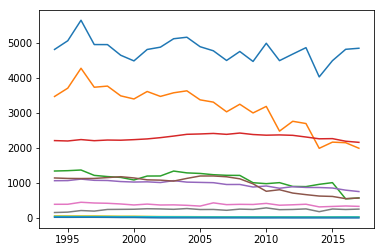

In [3]:
for y in range(1, len(headers)):
    plt.plot(data["Jahr"],data[headers[y]])


## Usage of builtin Classes
The lists we worked with last time are an example of classes which are built in to python, as are Strings, Sets, Dictionaries, Tupels, Range, ...

Broadly speaking, in python everything is an object. ```"Hello World"```is an example of an object of the class ```str``` (String). It has, for example the method ```upper```, which switches all of the characters to upper case. The number ```2``` is an example of an object of the class ```int```, ```[5, 19]``` is an example for an object of the class ```list```.

In [10]:
text = "Hello World"
print (text.upper())
print (type(text))

number = 2
print (type(number))

tax = [7, 19]
print(tax)
print (type(tax))
tax.clear()
print (tax)

HELLO WORLD
<class 'str'>
<class 'int'>
[7, 19]
<class 'list'>
[]


## Define your own class
A class can store different values (=> attributes) and methods for each member (=> object) of the class.

In our example it means, that every pokemon has a name that is unique for this kind of pokemon. This means, that pikachu is an object of the class pokemon.

It is also possible to store information on the class itself. In our example this is the pokedex, which is a list of all the pokemons which are known. This is information which is not special for one pokemon (=> object), but is common for all objects of the class pokemon.

All of the values, which are returned by the ```csv.reader``` are of the class ```str```. In this example there is a conversion for the hp attribute to ```int```. Only when we use this, we can calculate with the values in the hp attribute.

In [13]:
class pokemon:
    pokedex = []
    def __init__(self, name, total, type, hp, attack, defense, generation):
        self.name = name
        self.type= type
        self.total = total
        self.hp=int(hp)
        self.attack=int(attack)
        self.defense=int(defense)
        self.generation=generation
        self.pokedex.append(self)
    def __repr__(self):
        return "Pokemon: " + self.name + " Type: " + self.type + " Generation: " + self.generation
    def color(self):
        switcher = {
            'Fire':'red',
            'Grass':'green',
            'Bug':'green',
            'Ice':'blue',
            'Water':'blue',
            'Normal':'grey',
            'Electric':'yellow',
            'Ground':'brown',
            'Poison':'green',
            'Fairy':'blue',
            'Fighting':'yellow',
            'Dark':'grey',
            'Psychic':'grey',
            'Rock':'grey',
            'Ghost':'white',
            'Dragon':'blue'
        }
        return switcher[self.type]


## Build your pokedex
To read information from a file, you can use the method (```open``` file, skip header and use ```csv.reader```) we saw last time. If you call ```pokemon()``` by convention in python the method ```__init__```is called.

In [14]:
with open('pokemon.csv', 'r') as csvfile:
    rows = csv.reader(csvfile, delimiter=',', quotechar='"')
    #Skip Header line
    next(rows)
    for row in rows:
        pokemon(name=row[1], type=row[2], total = row[4], hp=row[5], attack=row[6], defense=row[7], generation=row[11])
pokemon.pokedex

[Pokemon: Bulbasaur Type: Grass Generation: 1,
 Pokemon: Ivysaur Type: Grass Generation: 1,
 Pokemon: Venusaur Type: Grass Generation: 1,
 Pokemon: VenusaurMega Venusaur Type: Grass Generation: 1,
 Pokemon: Charmander Type: Fire Generation: 1,
 Pokemon: Charmeleon Type: Fire Generation: 1,
 Pokemon: Charizard Type: Fire Generation: 1,
 Pokemon: CharizardMega Charizard X Type: Fire Generation: 1,
 Pokemon: CharizardMega Charizard Y Type: Fire Generation: 1,
 Pokemon: Squirtle Type: Water Generation: 1,
 Pokemon: Wartortle Type: Water Generation: 1,
 Pokemon: Blastoise Type: Water Generation: 1,
 Pokemon: BlastoiseMega Blastoise Type: Water Generation: 1,
 Pokemon: Caterpie Type: Bug Generation: 1,
 Pokemon: Metapod Type: Bug Generation: 1,
 Pokemon: Butterfree Type: Bug Generation: 1,
 Pokemon: Weedle Type: Bug Generation: 1,
 Pokemon: Kakuna Type: Bug Generation: 1,
 Pokemon: Beedrill Type: Bug Generation: 1,
 Pokemon: BeedrillMega Beedrill Type: Bug Generation: 1,
 Pokemon: Pidgey Typ

## Combine all of the things we learned
The following code block uses objects, lists, conditions, loops, methods. In short, everything you learned so far.

### Exercise
Clone to your repository and change the following parts:
1. Let him find your favorite Pokemon
2. Print the name and the attack value of the Pokemon with the strongest attack
3. Make a list of all of the Pokemon of type Poison. Print the first and the last Pokemon of this list.
4. Print only the name of the best defense Pokemon of type Rock.
5. Lookup the markdown cheat sheet and change the last part to
    1. show the name of the Pokemon in *bold*
    2. show the Pokemons in an unordered list
    3. show a horizontal rule in front of the first Pokemon

In [7]:
# Init the variables for the results
biggestPokemon = pokemon.pokedex[0]
firstgeneration = []
favorite = None
# Loop over all of the pokemon
for p in pokemon.pokedex:
    # If the current pokemon has more health, than the best before.
    if p.hp > biggestPokemon.hp:
        # The current pokemon is now the biggest (=> most health)
        biggestPokemon = p
    # Add the current pokemon to the list of the first generation ones.
    # Attention: Using p.generation == 1 doesn't work. In generation only str values are stored.
    if p.generation == '1':
        firstgeneration.append(p)
    # Change p.name to p.name.lower()
    if p.name == 'ponyta':
        favorite = p

# When you prepend your string with f, you can include variables directly inside curly braces.
print (f"{biggestPokemon.name} is the biggest Pokemon with {biggestPokemon.hp} HP.")
print ("{biggestPokemon.name} is the biggest Pokemon with {biggestPokemon.hp} HP.")

# When you don't want to use the f as above, you can concatenate strings with "+"
print("There are " + str(len(firstgeneration)) + " pokemon of the first generation.")

if (favorite != None):
    print (favorite)
else:
    print ("Sadly your favorite couldn't be found.")
    
for p in pokemon.pokedex[0:3]:
    display(Markdown(f'Pokemon: {p.name} Image ![](https://assets.pokemon.com/assets/cms2/img/pokedex/full/{pokemon.pokedex.index(p)+1:0>3}.png)'))

Blissey is the biggest Pokemon with 255 HP.
{biggestPokemon.name} is the biggest Pokemon with {biggestPokemon.hp} HP.
There are 166 pokemon of the first generation.
Sadly your favorite couldn't be found.


Pokemon: Bulbasaur Image ![](https://assets.pokemon.com/assets/cms2/img/pokedex/full/001.png)

Pokemon: Ivysaur Image ![](https://assets.pokemon.com/assets/cms2/img/pokedex/full/002.png)

Pokemon: Venusaur Image ![](https://assets.pokemon.com/assets/cms2/img/pokedex/full/003.png)

## Outlook for next time...
Next time we will learn about how to extend the possibilities of python with libraries and modules.

Please watch this videos for next time:

| Name | Link |
|---|---|
| NumPy | https://www.youtube.com/watch?v=xECXZ3tyONo |
| Pandas | https://www.youtube.com/watch?v=dcqPhpY7tWk |
| Webscraping | https://www.youtube.com/watch?v=Mll6emjBFvA |
| Bokeh | https://www.youtube.com/watch?v=i3-wsgtGhfs |

In [8]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d

output_notebook()

databasis = firstgeneration[0::10]

data = {"x_axis": [p.attack for p in databasis],
       "y_axis":[p.defense for p in databasis],
       "size":[p.hp/2 for p in databasis],
       "name":[p.name for p in databasis],
       "color":[p.color() for p in databasis]}
source = ColumnDataSource(data)
plot = figure(plot_width=400, plot_height=400)
# add a circle renderer with x and y coordinates, size, color, and alpha
plot.circle('x_axis', 'y_axis', size='size', line_color="navy", fill_color='color', fill_alpha=0.5, source=source)
labels = LabelSet(x='x_axis', y='y_axis', text='name', level='glyph', x_offset=3, y_offset=3, source=source,text_font_size='8pt')
plot.add_layout(labels)
show(plot) # show the results

Loading BokehJS ...

## Bonus
https://www.lego.com/en-us/aboutus/news/2020/june/lego-mindstorms-robot-inventor/